In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
data = pd.read_csv('C:/Users/edenm\Desktop/PYTHON/matala2_cosmetics_2019-Nov.csv') 
#dataset = data.loc[100:120]
#dataset.tail(5)

C:\Users\edenm\AppData\Local\Temp\ipykernel_12924\2985822413.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('C:/Users/edenm\Desktop/PYTHON/matala2_cosmetics_2019-Nov.csv')


In [3]:
#dataset.info()

In [6]:
data['event_time']= pd.to_datetime(data['event_time'])
# Calculate the duration to the next event:
data['duration_to_next_event'] = data.groupby('user_session')['event_time'].shift(-1) - data['event_time']

# For last event in visit, set to 0:
data.loc[data.groupby('user_session').tail(1).index, 'duration_to_next_event'] = 0
#dataset['duration_to_next_event'] 

In [4]:
data['event_time'] = pd.to_datetime(data['event_time'])

Q2:

In [7]:
# Sort dataframe by user_id and visit_date
data = data.sort_values(['user_id', 'event_time'])

# Create a series of time differences between visits for each user
time_diffs = data.groupby('user_id')['event_time'].diff()

# Create a series of flags for the start of each panel
panel_starts = (time_diffs >= pd.Timedelta(days=5)) | time_diffs.isna()

# Create a series of panel numbers based on the start of each panel
panel_numbers = panel_starts.groupby(data['user_id']).cumsum()

# Assign the panel numbers to the dataframe
data['funnel_number'] = panel_numbers
#dataset.head(10)

Q3:

In [8]:

data.sort_values(['user_id', 'user_session', 'event_time'], inplace=True)
grouped = data.groupby(['user_id', 'funnel_number'])
data['index_in_funnel'] = grouped['user_session'].transform(lambda x: (x != x.shift()).cumsum())
data.head()


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,funnel_number,index_in_funnel
437209,2019-11-04 15:28:57+00:00,view,5240,1487580009202712597,NaN,runail,4.05,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,0,1,1
2494623,2019-11-19 11:14:48+00:00,view,5814066,1487580005855658874,NaN,grattol,2.3,1458813,6873a205-d9f5-4d51-b3eb-b4bfddfe907c,0,1,1
2640971,2019-11-20 11:58:06+00:00,view,5800358,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,0 days 00:00:21,1,2
2641003,2019-11-20 11:58:27+00:00,view,5800349,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,0 days 00:01:12,1,2
2641209,2019-11-20 11:59:39+00:00,view,5800349,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,0 days 00:00:28,1,2


Q4:

In [9]:
import re
# regular expression pattern to match prices
price_pattern = re.compile(r'(\d+\.\d+)')

# extract the price value and convert it to float
data['price'] = data['price'].str.extract(price_pattern, expand=False).astype(float)


Q5:

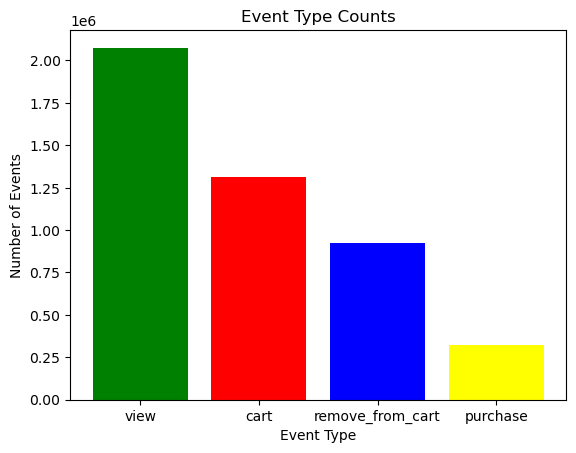

In [10]:
# display the unique values in the event_type column
#dataset['event_type'].unique()
# get the counts of each event type
event_counts = data['event_type'].value_counts().astype(int)
# create a bar plot of the event counts
plt.bar(event_counts.index, event_counts.values)
# set the x-axis and y-axis labels and the plot title
plt.xlabel('Event Type')
plt.ylabel('Number of Events')
plt.title('Event Type Counts')
# create a list of colors for each event type
colors = ['green', 'red', 'blue' , 'yellow']

# plot the bar chart with colors
plt.bar(event_counts.index, event_counts.values, color=colors)

plt.show()

Q6:

In [11]:

# new data frame and insert the old columns:
session_data = pd.DataFrame()
session_data['user_id'] = data.drop_duplicates(subset=['user_id', 'user_session'])['user_id'].reset_index(drop=True)
session_data['user_session'] = data.drop_duplicates(subset=['user_id', 'user_session'])['user_session'].reset_index(drop=True)
session_data['funnel_number'] = data.drop_duplicates(subset=['user_id', 'user_session'])['funnel_number'].reset_index(drop=True)
session_data['index_in_funnel'] = data.drop_duplicates(subset=['user_id', 'user_session'])['index_in_funnel'].reset_index(drop=True)

# new columns:
session_data['number_of_events'] = data.groupby(['user_id', 'user_session'])['event_time'].count().reset_index(drop=True)
session_data['duration_time'] = data.groupby(['user_id', 'user_session'])['event_time'].max().reset_index(drop=True) - data.groupby(['user_id', 'user_session'])['event_time'].min().reset_index(drop=True) 
session_data['list_of_viewed'] = data[data['event_type'] == 'view'].groupby(['user_id', 'user_session'])['product_id'].apply(list).reset_index(drop=True)
session_data['list_of_added_to_cart'] = data[data['event_type'] == 'cart'].groupby(['user_id', 'user_session'])['product_id'].apply(list).reset_index(drop=True)
session_data['list_of_purchased'] = data[data['event_type'] == 'purchase'].groupby(['user_id', 'user_session'])['product_id'].apply(list).reset_index(drop=True)
session_data.head()

,user_id,user_session,funnel_number,index_in_funnel,number_of_events,duration_time,list_of_viewed,list_of_added_to_cart,list_of_purchased
0,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,1,1,1.0,0 days 00:00:00,[5240],"[5745712, 49674, 5587748, 4590, 34763]","[5812033, 5724621, 5809910, 5811668]"
1,1458813,6873a205-d9f5-4d51-b3eb-b4bfddfe907c,1,1,1.0,0 days 00:00:00,[5814066],[5569506],"[5766379, 5614842]"
2,1458813,921ff98c-a419-4132-af94-ee26880334b0,1,2,28.0,0 days 01:03:09,"[5800358, 5800349, 5800349, 5800358, 5712576, ...","[5896421, 5841190, 5896422, 5896419]","[5809910, 5809911, 5809912, 5862544, 5870648, ..."
3,1458813,ad1a2e9e-cc14-4b98-b70b-5dd539e76bba,1,3,1.0,0 days 00:00:00,[5711087],"[5896421, 5896422]","[5850620, 5850625, 5850621, 5850619, 5816166, ..."
4,1458813,b16644a2-44db-4650-8156-f6f03782d432,1,4,1.0,0 days 00:00:00,[5711145],"[5811668, 5811668, 5724608, 5724658, 5724658, ...","[5846442, 5686083]"
